In [1]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading the dataset 
cars_dataframe = pd.read_csv('/content/car_data.csv')
cars_dataframe.shape

(1727, 7)

**Preprocessing with data**

In [0]:
#Since our dataset doesn't contain the name of columns, the column names were assigned 
cars_dataframe.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']

In [4]:
#Overview of data
cars_dataframe.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
#Checking missing values in our dataset 
cars_dataframe.isnull().sum()

Buying        0
Maint         0
Doors         0
Persons       0
LugBoot       0
Safety        0
Evaluation    0
dtype: int64

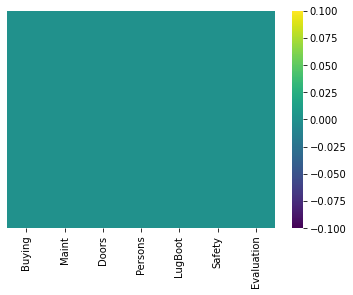

In [6]:
# heatmap for null
sns.heatmap(cars_dataframe.isnull(), yticklabels=False, cmap="viridis")

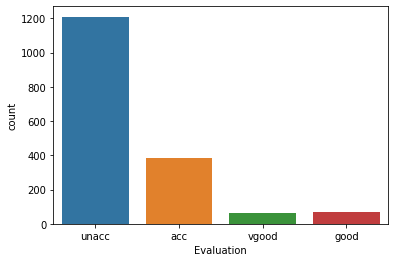

In [7]:
# Analyze target feature data
sns.countplot(x="Evaluation", data=cars_dataframe)

In [8]:
# There is no missing value in our data set so here more about data.
cars_dataframe.describe()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1209


In [9]:
#Number of car in cars_dataframe in each evaluation category
cars_dataframe['Evaluation'].value_counts().sort_index()

acc       384
good       69
unacc    1209
vgood      65
Name: Evaluation, dtype: int64

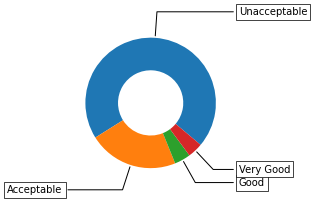

In [10]:
#Number of car in cars_dataframe in each evaluation category ploting using donut chart matplotlib
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = [ "Unacceptable",
        "Acceptable",
        "Good",
        "Very Good"]

data = [1210,384,69,65]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# ax.set_title("Distribution of evaluated cars_dataframe_dataframe: Donut")

plt.show()

In [0]:
# replacing 5more and more with value 5
cars_dataframe.Doors.replace(('5more'),('5'),inplace=True)
cars_dataframe.Persons.replace(('more'),('5'),inplace=True)

In [0]:
#Dividing the dataframe into x features and y target variable
x = cars_dataframe.iloc[:, :-1]
y = cars_dataframe.iloc[:, 6]

In [0]:
x.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety']
y.columns=['Evaluation']

In [14]:
x.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [0]:
#Encode the input feature using dummies function
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)

In [16]:
x.head(5)

,Buying_low,Buying_med,Buying_vhigh,Maint_low,Maint_med,Maint_vhigh,Doors_3,Doors_4,Doors_5,Persons_4,Persons_5,LugBoot_med,LugBoot_small,Safety_low,Safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [0]:
x=x.values
y=y.values

**Train-Test-Split**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

**Classifiers**

In [0]:
#importing all model library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Logistic Regression**

Training Accuracy:  0.9081081081081082
Testing Accuracy:  0.8888888888888888
Model Evaluation: Confusion Matrix


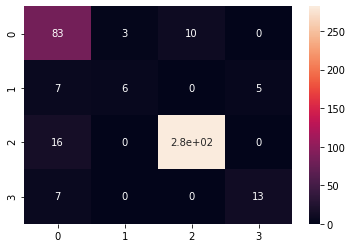

In [20]:
#Logistic regression
from sklearn.metrics import confusion_matrix
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Training Accuracy: ",classifier.score(X_train, y_train))
print("Testing Accuracy: ", classifier.score(X_test, y_test))
print("Model Evaluation: Confusion Matrix")
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

**KNN classifier**

Training Accuracy:  0.9196911196911197
Testing Accuracy:  0.8472222222222222
Model Evaluation: Confusion Matrix


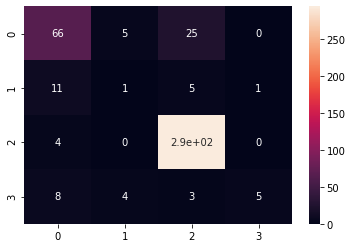

In [21]:
# KNN Classifier
from sklearn.metrics import confusion_matrix
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Training Accuracy: ",classifier.score(X_train, y_train))
print("Testing Accuracy: ", classifier.score(X_test, y_test))
print("Model Evaluation: Confusion Matrix")
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

**Decision tree classifier**

Training Accuracy:  1.0
Testing Accuracy:  0.8981481481481481
Model Evaluation: Confusion Matrix


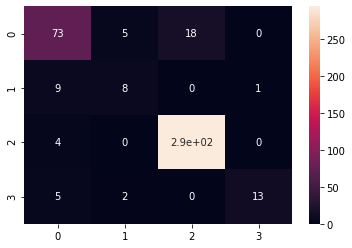

In [22]:
from sklearn.metrics import confusion_matrix
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Training Accuracy: ",classifier.score(X_train, y_train))
print("Testing Accuracy: ", classifier.score(X_test, y_test))
print("Model Evaluation: Confusion Matrix")
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

**Random forest classifier**

Training Accuracy:  1.0
Testing Accuracy:  0.875
Model Evaluation: Confusion Matrix


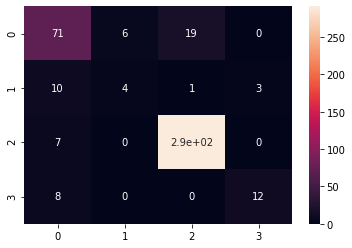

In [23]:
from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Training Accuracy: ",classifier.score(X_train, y_train))
print("Testing Accuracy: ", classifier.score(X_test, y_test))
print("Model Evaluation: Confusion Matrix")
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

**Naive Bayes Classifier**

Training Accuracy:  0.48494208494208496
Testing Accuracy:  0.5
Model Evaluation : Confusion Matrix


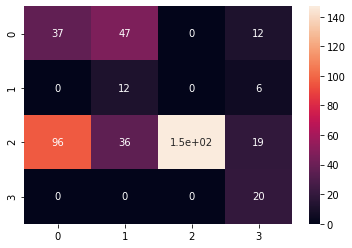

In [24]:
#Using NB classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Training Accuracy: ",classifier.score(X_train, y_train))
print("Testing Accuracy: ", classifier.score(X_test, y_test))
print("Model Evaluation: Confusion Matrix")
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)
plt.show()